In [ ]:
import pandas as pd
import sys
from google.colab import files
import io

uploaded = files.upload()
my_df = pd.read_csv(io.BytesIO(uploaded['creditApproval.csv']))

Saving creditApproval.csv to creditApproval (9).csv


In [ ]:
my_df.head()

,Homeowner,Credit Score,Years of Credit History,Revolving Balance,Revolving Utilization,Decision
0,1,725,20,11320,0.25,1
1,1,573,9,7200,0.70,0
2,1,677,11,20000,0.55,1
3,0,625,15,12800,0.65,0
4,0,527,12,5700,0.75,0


In [ ]:
import numpy as np
# Labels are the values we want to predict
labels = np.array(my_df['Credit Score'])
my_df = my_df.drop('Credit Score', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math

train_instances, test_instances, train_labels, test_labels = train_test_split(my_df, labels, test_size = 0.20)

def evaluate_results(gTestLabel, gTestPredictions):
  mse = round(mean_squared_error(gTestLabel, gTestPredictions))
  rmse = math.sqrt(mse)
  var_score = round(r2_score(gTestLabel, gTestPredictions), 2)
  return mse, rmse, var_score

In [ ]:
# linear regression
regr = linear_model.LinearRegression()
model = regr.fit(train_instances, train_labels)
test_predictions = model.predict(test_instances)
# get mse, rmse, var_score
print(evaluate_results(test_labels, test_predictions))
# print regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

(1999, 44.710177812216315, 0.66)
Intercept: 
 725.7879024411907
Coefficients: 
 [-1.92274261e-01 -2.91438130e+00  2.40368415e-03 -1.92204308e+02
  4.42411739e+01]


In [ ]:
train_instances, test_instances, train_labels, test_labels = train_test_split(my_df, labels, test_size = 0.20)

In [ ]:
# KNN regression
regr = KNeighborsRegressor(n_neighbors=2)
model = regr.fit(train_instances, train_labels)
test_predictions = model.predict(test_instances)
# get mse, rmse, var_score
evaluate_results(test_labels, test_predictions)



(3953, 62.8728876384726, 0.31)

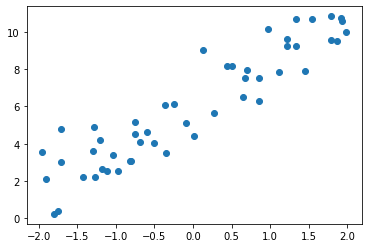

In [ ]:
# POLYNOMIAL REGRESSION EXAMPLE
# generate data
import numpy as np
import matplotlib.pyplot as plt
n_points = 50
b = 6 # intercept
m = 2.25 # slope
noise_mean = 0.0
noise_var = 1.21
X = []
r = []
for i in range(n_points):
  #rnd_num = random.random()
  rnd_num = np.random.uniform(-2, 2)
  X.append(rnd_num)
  r.append(b + m*rnd_num + np.random.normal(loc=noise_mean, scale=noise_var))
plt.scatter(X, r, marker='o');

In [ ]:
# a function to calculate RMSE
def getRMSE(gr, gprVals):
  # report Root Mean Squared Error (RMSE) as output
  sum_squared_error=0
  N = len(X)

  for index in range(len(gr)):
    error = gprVals[index] - gr[index]
    squared_error = pow(error, 2)
    sum_squared_error += squared_error
  mean_squared_error = sum_squared_error/N
  tmp_RMSE = pow(mean_squared_error, 0.5)
  return tmp_RMSE

In [ ]:
# data reformatting
xx = np.array(X)
rr = np.array(r)
# transforming the data to include another axis
xx = xx[:, np.newaxis]
rr = rr[:, np.newaxis]

import operator
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(xx)

model = linear_model.LinearRegression()
model.fit(x_poly, rr)
r_poly_pred = model.predict(x_poly)
# The coefficients + Intercept
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [5.90680653]
Coefficients: 
 [[ 0.          2.71011409  0.11135507 -0.17153534]]


RMSE [1.11586033]


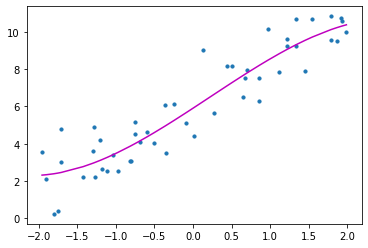

[5.90680653] [[ 0.          2.71011409  0.11135507 -0.17153534]]


In [ ]:
RMSE = getRMSE( rr, r_poly_pred)
print('RMSE',RMSE)
plt.scatter(xx, rr, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)

sorted_zip = sorted(zip(xx,r_poly_pred), key=sort_axis)
xx, r_poly_pred = zip(*sorted_zip)
plt.plot(xx, r_poly_pred, color='m')
plt.show()
print(model.intercept_, model.coef_)